FIAP - Engenharia de Software 2ESPW
<br>
CP00 - Dynamic Programming
<br>
André Lambert - RM 99148

Gere uma lista com os tipos (‘types’) dos trabalhos ali presentes. 
Dessa  lista,  precisamos  saber  quanto  de  cada  tipo  há. 
Adicionalmente, precisamos saber qual  é  o que  possui maior 
quantidade, assim como o de menor quantidade.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [8]:

# Carregando o arquivo CSV
baseNetflix = pd.read_csv('netflix_titles.csv')

# Dividindo os valores na coluna 'type' e criando uma nova linha para cada tipo
baseNetflix['type'] = baseNetflix['type'].str.split(', ')
baseNetflix = baseNetflix.explode('type')

# Contando o número de conteúdos para cada tipo
contagem_tipos = baseNetflix['type'].value_counts()

# Identificando o tipo com mais conteúdos
tipo_max_contagem = contagem_tipos.idxmax()
max_contagem = contagem_tipos.max()

# Identificando o tipo com menos conteúdos
tipo_min_contagem = contagem_tipos.idxmin()
min_contagem = contagem_tipos.min()

# Imprimindo os resultados
print(f'O tipo com mais conteúdo é {tipo_max_contagem} com {max_contagem} conteúdos')
print(f'O tipo com menos conteúdo é {tipo_min_contagem} com {min_contagem} conteúdos')
print(f'O número total de tipos é {len(contagem_tipos)}')

# Gere uma lista com os tipos de trabalhos presentes e suas quantidades
lista_tipos_conteudo = contagem_tipos.reset_index()
lista_tipos_conteudo.columns = ['Tipo', 'Quantidade']
print('\nLista de tipos de conteúdo e suas quantidades:')
print(lista_tipos_conteudo)


O tipo com mais conteúdo é Movie com 6131 conteúdos
O tipo com menos conteúdo é TV Show com 2676 conteúdos
O número total de tipos é 2

Lista de tipos de conteúdo e suas quantidades:
      Tipo  Quantidade
0    Movie        6131
1  TV Show        2676


Execute  a  mesma  solução  para  o  campo  rating,  que  é  a 
classificação da adequabilidade para se assistir.

In [9]:
# Dividindo os valores na coluna 'rating' e criando uma nova linha para cada classificação
baseNetflix['rating'] = baseNetflix['rating'].str.split(', ')
baseNetflix = baseNetflix.explode('rating')

# Contando o número de conteúdos para cada classificação
contagem_rating = baseNetflix['rating'].value_counts()

# Identificando a classificação com mais conteúdos
rating_max_contagem = contagem_rating.idxmax()
max_contagem_rating = contagem_rating.max()

# Identificando a classificação com menos conteúdos
rating_min_contagem = contagem_rating.idxmin()
min_contagem_rating = contagem_rating.min()

# Imprimindo os resultados
print(f'A classificação com mais conteúdo é {rating_max_contagem} com {max_contagem_rating} conteúdos')
print(f'A classificação com menos conteúdo é {rating_min_contagem} com {min_contagem_rating} conteúdos')
print(f'O número total de classificações é {len(contagem_rating)}')

# Gere uma lista com as classificações de conteúdos presentes e suas quantidades
lista_classificacoes = contagem_rating.reset_index()
lista_classificacoes.columns = ['Classificação', 'Quantidade']
print('\nLista de classificações de conteúdo e suas quantidades:')
print(lista_classificacoes)

A classificação com mais conteúdo é TV-MA com 3207 conteúdos
A classificação com menos conteúdo é 74 min com 1 conteúdos
O número total de classificações é 17

Lista de classificações de conteúdo e suas quantidades:
   Classificação  Quantidade
0          TV-MA        3207
1          TV-14        2160
2          TV-PG         863
3              R         799
4          PG-13         490
5          TV-Y7         334
6           TV-Y         307
7             PG         287
8           TV-G         220
9             NR          80
10             G          41
11      TV-Y7-FV           6
12         NC-17           3
13            UR           3
14        74 min           1
15        84 min           1
16        66 min           1


Sobre o campo ‘description’,  organize duas pilhas: uma com o 
quarto caractere e outra com o décimo-terceiro  caractere. Para 
cada uma dessas listas, indique qual o caractere mais frequente 
e o menos frequente. 

In [10]:

# Extraindo o quarto caractere e o décimo-terceiro caractere de cada descrição
quarto_caractere = baseNetflix['description'].str[3]
decimo_terceiro_caractere = baseNetflix['description'].str[12]

# Contando a frequência de cada caractere nas pilhas
frequencia_quarto = Counter(quarto_caractere)
frequencia_decimo_terceiro = Counter(decimo_terceiro_caractere)

# Encontrando o caractere mais frequente e o menos frequente para cada pilha
mais_frequente_quarto = frequencia_quarto.most_common(1)[0]
menos_frequente_quarto = frequencia_quarto.most_common()[-1]

mais_frequente_decimo_terceiro = frequencia_decimo_terceiro.most_common(1)[0]
menos_frequente_decimo_terceiro = frequencia_decimo_terceiro.most_common()[-1]

# Imprimindo os resultados
print("Para o quarto caractere:")
print(f"Mais frequente: {mais_frequente_quarto[0]}, Frequência: {mais_frequente_quarto[1]}")
print(f"Menos frequente: {menos_frequente_quarto[0]}, Frequência: {menos_frequente_quarto[1]}")

print("\nPara o décimo-terceiro caractere:")
print(f"Mais frequente: {mais_frequente_decimo_terceiro[0]}, Frequência: {mais_frequente_decimo_terceiro[1]}")
print(f"Menos frequente: {menos_frequente_decimo_terceiro[0]}, Frequência: {menos_frequente_decimo_terceiro[1]}")


Para o quarto caractere:
Mais frequente: e, Frequência: 1481
Menos frequente: ", Frequência: 1

Para o décimo-terceiro caractere:
Mais frequente:  , Frequência: 1273
Menos frequente: Z, Frequência: 1


Faça  uma  função  para  contar  quantos  caracteres  há  nesse 
campo ‘description’, em cada registro, e monte uma lista com as 
respectivas  somas.  Apresente  uma  distribuição  desses 
quantitativos.

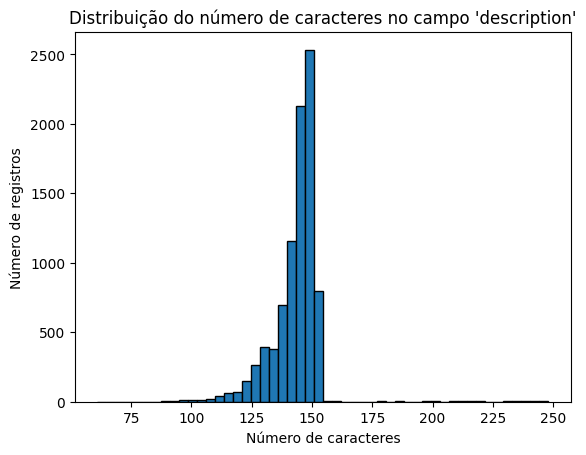

In [11]:
def count_description_chars(df):
    description_lengths = [len(str(description)) for description in df['description']]
    return description_lengths

# Use a função para contar os caracteres no campo 'description'
description_lengths = count_description_chars(baseNetflix)

# Crie um histograma para visualizar a distribuição
plt.hist(description_lengths, bins=50, edgecolor='black')
plt.title('Distribuição do número de caracteres no campo \'description\'')
plt.xlabel('Número de caracteres')
plt.ylabel('Número de registros')
plt.show()